## Example: Kernel Ridge Regression

We will simulate some data from the model

$$y_i=f_\star(x_i)+\epsilon_i,$$

with $\epsilon_i\sim \mathcal N(0,0.1^2)$ and $f_\star(x)=x-1.2x-0.8x^3+0.6\cos(2\pi x)$.

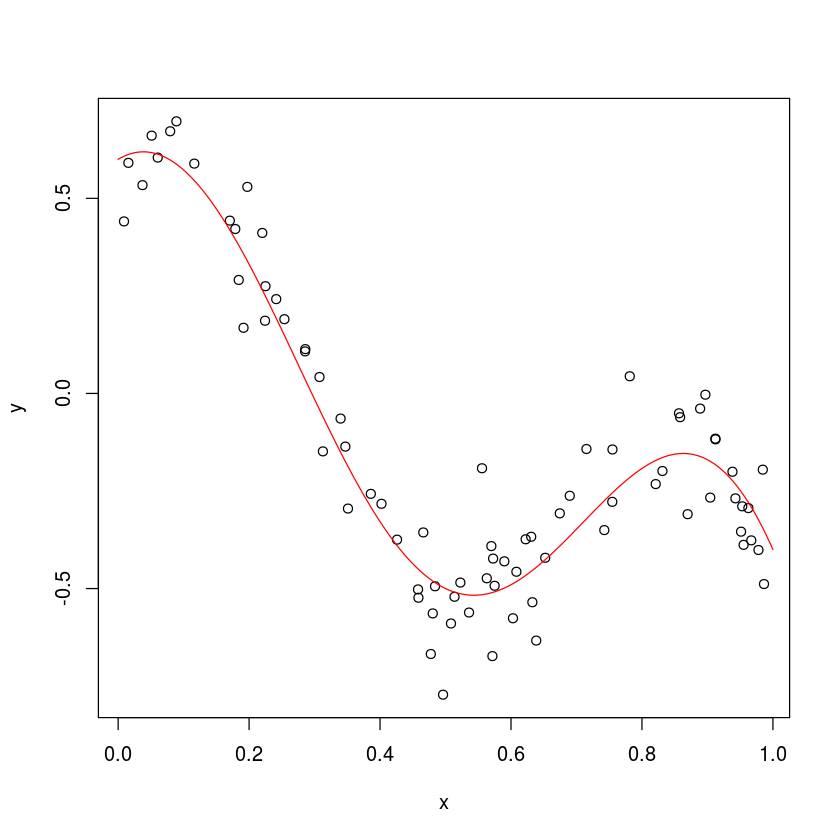

In [152]:
fstar <- function(x){
return(x-1.2*x^2-0.8*x^3+0.6*cos(2*pi*x))
}

sgma <- 0.1
n <- 80
x <- runif(n)
y <- fstar(x)+sgma*rnorm(n)
plot(x,y)

gridx=0:200/200
fgridx <- fstar(gridx)
lines(gridx,fgridx,col='red')

Let us fit kernel ridge regression with a Gaussian kernel. Package `CVST/kernlab` we use below uses the convention
$$k(x,y)=\exp\left(-\sigma\Vert x-x'\Vert_2^2\right)$$
for the Gaussian RBF kernel. Thus, larger values of $\sigma$ correspond to rougher kernels. First let us keep $\sigma$ fixed and vary the regularisation parameter $\lambda$. The blue lines are fitted regression functions. Note how very small $\lambda$ leads to overfitting (not enough regularisation), while very large $\lambda$ leads to underfitting (too much regularisation).

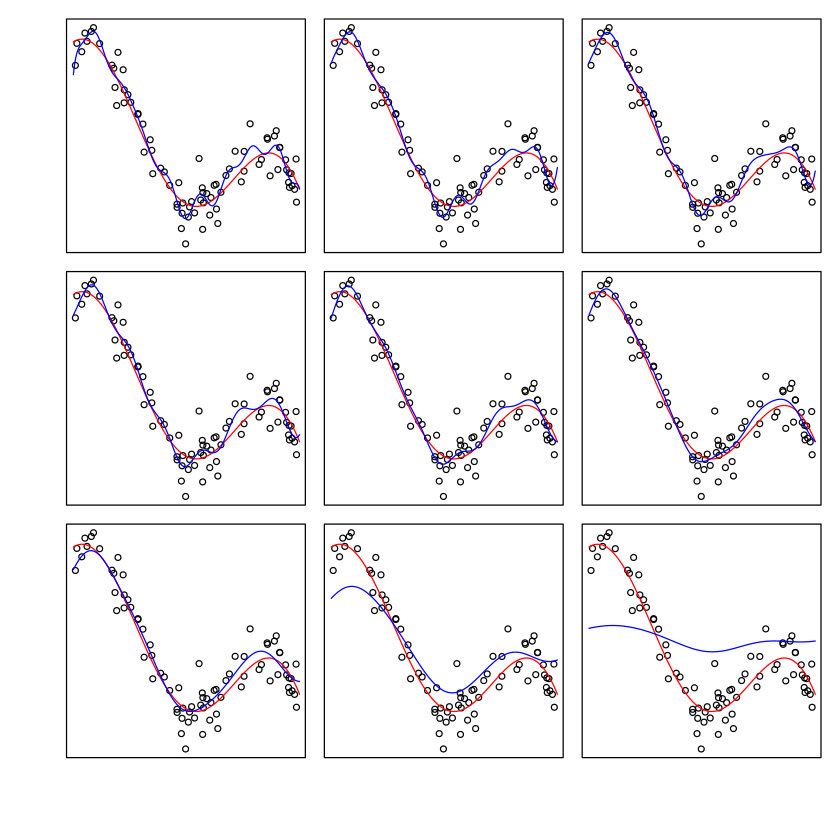

In [156]:
library(CVST)
krr <- constructKRRLearner()

dat <- constructData(x,y)
dat_tst <- constructData(gridx,0)

par(mfrow=c(3,3),oma = c(5,4,0,0) + 0.1,mar = c(0,0,1,1) + 0.1)
lambdas= 10^(-8:0)
for(lambda in lambdas){
param <- list(kernel="rbfdot", sigma=50, lambda=lambda)
krr.model <- krr$learn(dat,param)
pred <- krr$predict(krr.model,dat_tst)
plot(x,y,xaxt='n',yaxt='n')
lines(gridx,fgridx,col='red')
lines(gridx,pred,col='blue')
}

Now let us keep $\lambda$ fixed and vary the inverse bandwidth $\sigma$. Here, very small $\sigma$ leads to to underfitting (kernel too smooth), while very large $\sigma$ leads to overfitting (kernel too rough).

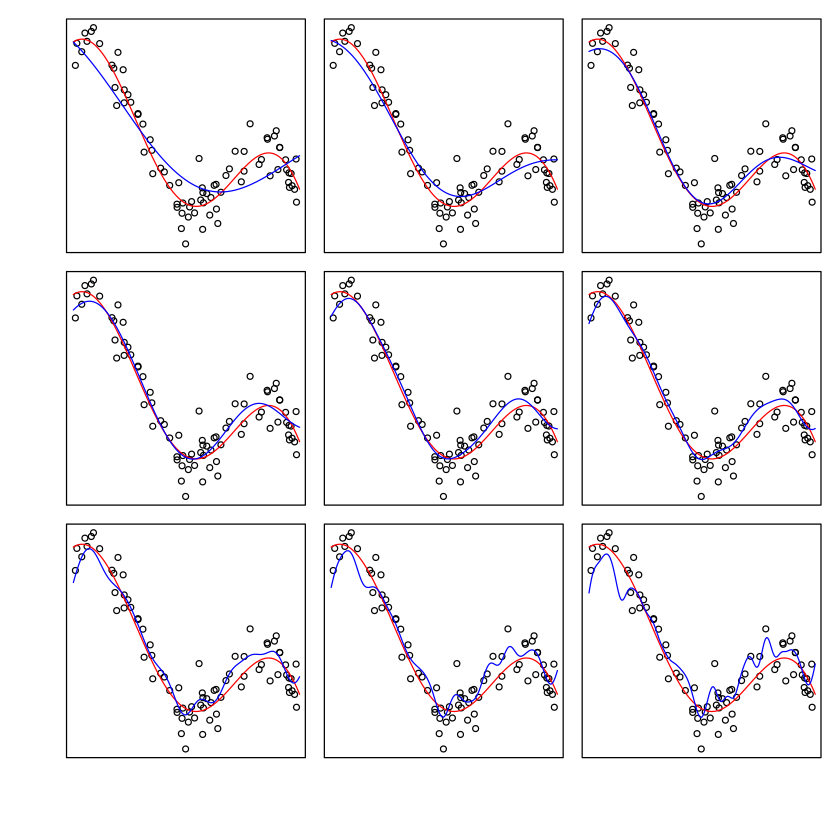

In [157]:
par(mfrow=c(3,3),oma = c(5,4,0,0) + 0.1,mar = c(0,0,1,1) + 0.1) 
sigmas=10^((1:9)/3)
for(sigma in sigmas){
param <- list(kernel="rbfdot", sigma=sigma, lambda=0.01)
krr.model <- krr$learn(dat,param)
pred <- krr$predict(krr.model,dat_tst)
plot(x,y,xaxt='n',yaxt='n')
lines(gridx,fgridx,col='red')
lines(gridx,pred,col='blue')
}

Now, let us use cross-validation to select both $\lambda$ and $\sigma$ and rerun the KRR with the selected values of the parameters.

In [158]:
params <- constructParams(kernel="rbfdot", sigma=sigmas, lambda=lambdas)
opt <- CV(dat, krr, params, fold=10, verbose=FALSE)

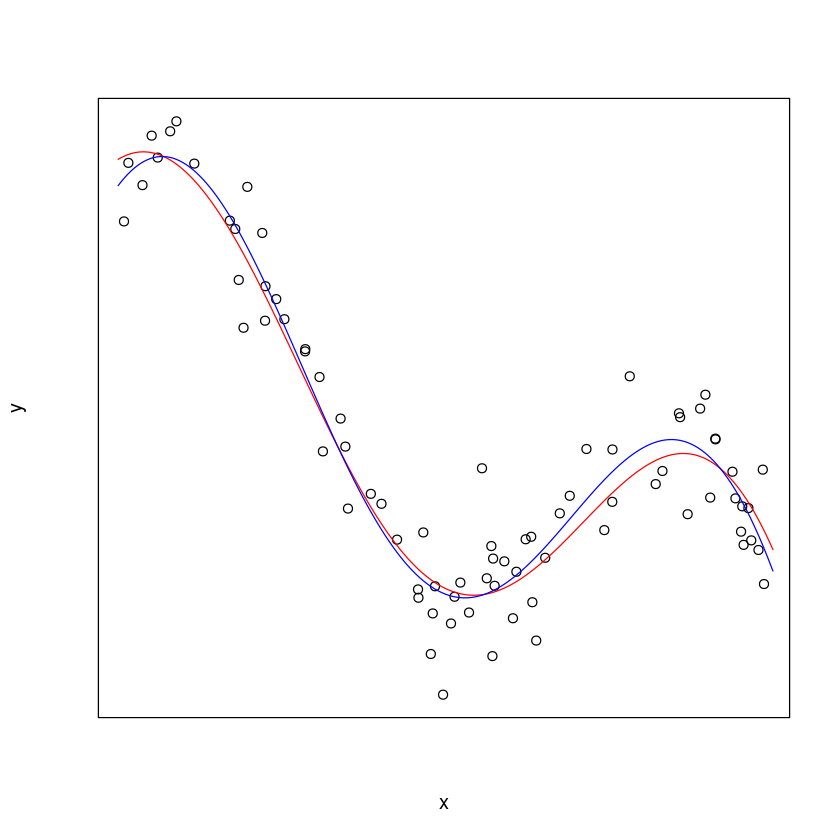

In [159]:
param <- list(kernel="rbfdot", sigma=opt[[1]]$sigma, lambda=opt[[1]]$lambda)
krr.model <- krr$learn(dat,param)
pred <- krr$predict(krr.model,dat_tst)
plot(x,y,xaxt='n',yaxt='n')
lines(gridx,fgridx,col='red')
lines(gridx,pred,col='blue')